In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from kilroyplot.plot import plt

In [2]:
class RegressionLSTM(nn.Module):
    def __init__(self, in_dim, hidden_dim):
        super().__init__()
        self.lstm = nn.LSTM(in_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        _, (ht, _) = self.lstm(x)
        return self.linear(ht[-1])

In [3]:
in_dim, hidden_dim = 1, 16

In [4]:
x_good, y_good = torch.normal(-10, 1, size=(1000, 10, in_dim)), torch.normal(10, 1, size=(1000, 1))
x_bad, y_bad = torch.normal(10, 1, size=(1000, 10, in_dim)), torch.normal(-10, 1, size=(1000, 1))

x, y = torch.cat([x_good, x_bad]), torch.cat([y_good, y_bad])

dataloader = DataLoader(TensorDataset(x,y), shuffle=True, batch_size=16)

In [5]:
model = RegressionLSTM(in_dim, hidden_dim)

In [6]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [7]:
criterion = nn.MSELoss()

In [8]:
epochs = 100

In [9]:
losses = []
for _ in range(epochs):
    epoch_losses = []
    for x, y_true in dataloader:
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y_true)
        epoch_losses.append(loss.item())
        loss.backward()
        optimizer.step()
    losses.append(np.mean(epoch_losses))

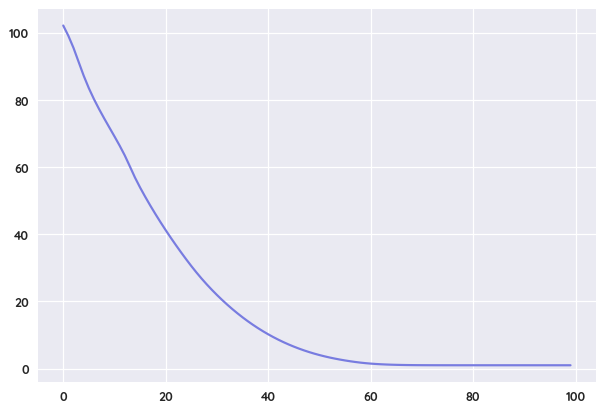

In [10]:
plt.plot(losses)

In [11]:
y_good.mean(), model(x_good).detach().mean()

(tensor(9.9959), tensor(9.9864))

In [12]:
y_bad.mean(), model(x_bad).detach().mean()

(tensor(-10.0392), tensor(-10.0476))